# Krippendorff’s Alpha

Krippendorff's Alpha is a statistical measure of inter-rater reliability used to assess the level of agreement between multiple raters or coders, especially when evaluating qualitative or categorical data. Unlike other measures, Krippendorff's Alpha is robust in handling multiple raters, different levels of measurement (nominal, ordinal, interval), and missing data, making it widely applicable in research.

Key Aspects of Krippendorff's Alpha
Range: The value of Krippendorff's Alpha ranges from 0 to 1:

1 indicates perfect agreement among raters.
0 indicates no agreement beyond chance.
Negative values imply systematic disagreement.
Data Types: Krippendorff's Alpha can handle various types of data:

Nominal (categories with no inherent order, like "yes" or "no").
Ordinal (ranked categories).
Interval (continuous data with meaningful distances but no true zero).
Handling Missing Data: Krippendorff's Alpha is flexible with missing data and doesn’t require complete data from all raters.


In [2]:
!pip install krippendorff

In [6]:
import pandas as pd
import krippendorff

# Function to filter data based on quantiles
def filter_quantiles(df, low=0.05, high=0.95):
    quant_df = df.quantile([low, high])
    return df.apply(lambda x: x[(x > quant_df.loc[low, x.name]) & (x < quant_df.loc[high, x.name])], axis=0)

# Function to calculate Krippendorff's alpha
def calculate_krippendorff_alpha(data, name):
    alpha = krippendorff.alpha(reliability_data=data.values)
    print(f"Krippendorff's alpha for {name}: {alpha}")

# Sample data loading - Replace these lines with your actual CSV data paths
Data1 = pd.read_csv('informativeness.csv')
Data2 = pd.read_csv('clarity.csv')
Data3 = pd.read_csv('effectiveness.csv')

# Data1 = pd.read_csv('informativeness.csv')
# Data2 = pd.read_csv('clarity.csv')
# Data3 = pd.read_csv('effectiveness.csv')

# Remove top 5% and bottom 5% outliers
Data1_filtered = filter_quantiles(Data1)
Data2_filtered = filter_quantiles(Data2)
Data3_filtered = filter_quantiles(Data3)

# Calculate Krippendorff's alpha before and after outlier removal
print("Krippendorff's Alpha (Before Outlier Removal):")
calculate_krippendorff_alpha(Data1, "Informativeness (Before)")
calculate_krippendorff_alpha(Data2, "Clarity (Before)")
calculate_krippendorff_alpha(Data3, "Effectiveness (Before)")

print("\nKrippendorff's Alpha (After Outlier Removal):")
calculate_krippendorff_alpha(Data1_filtered, "Informativeness (After)")
calculate_krippendorff_alpha(Data2_filtered, "Clarity (After)")
calculate_krippendorff_alpha(Data3_filtered, "Effectiveness (After)")


Krippendorff's Alpha (Before Outlier Removal):
Krippendorff's alpha for Informativeness (Before): 0.2759190228721381
Krippendorff's alpha for Clarity (Before): 0.3346849580551787
Krippendorff's alpha for Effectiveness (Before): 0.18503984911836624

Krippendorff's Alpha (After Outlier Removal):
Krippendorff's alpha for Informativeness (After): 0.5578494623655914
Krippendorff's alpha for Clarity (After): 0.6065698178664354
Krippendorff's alpha for Effectiveness (After): 0.18914776210913553


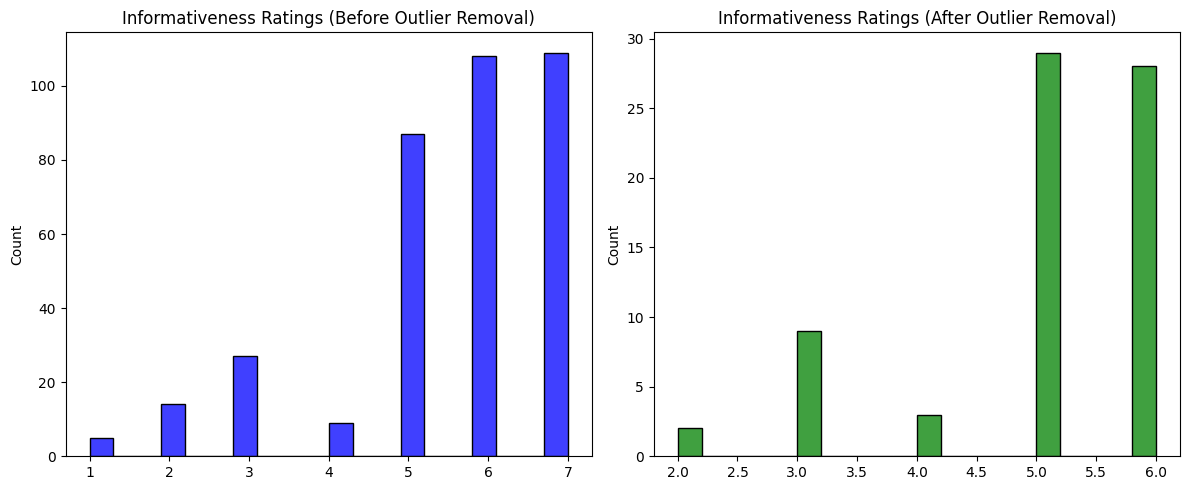

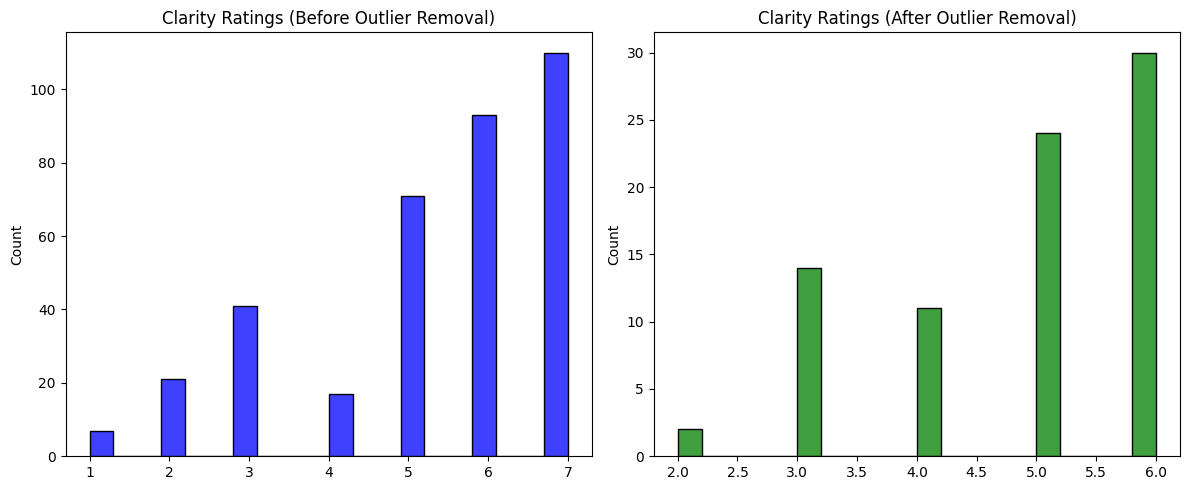

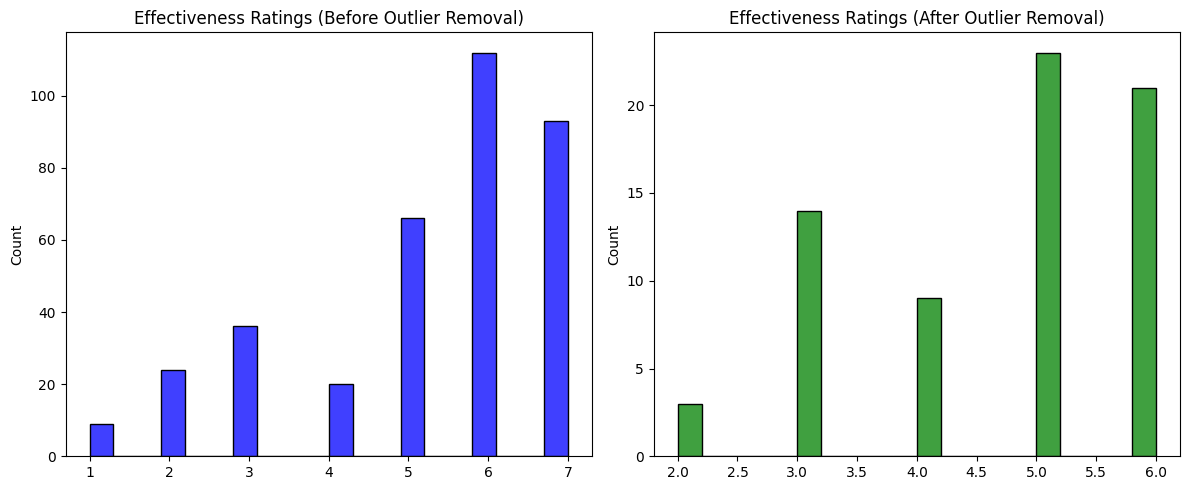

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to filter data based on quantiles
def filter_quantiles(df, low=0.05, high=0.95):
    quant_df = df.quantile([low, high])
    return df.apply(lambda x: x[(x > quant_df.loc[low, x.name]) & (x < quant_df.loc[high, x.name])], axis=0)

# Function to create plots for the data before and after outlier removal
def plot_distribution(data, filtered_data, title):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot original data
    sns.histplot(data.stack(), ax=axes[0], bins=20, color='blue')
    axes[0].set_title(f'{title} Ratings (Before Outlier Removal)')

    # Plot filtered data
    sns.histplot(filtered_data.stack(), ax=axes[1], bins=20, color='green')
    axes[1].set_title(f'{title} Ratings (After Outlier Removal)')

    plt.tight_layout()
    plt.show()

# Function to display statistical summary before and after outlier removal
def display_stats(data, filtered_data, name):
    print(f"\n{name} - Before Outlier Removal")
    print(data.describe())

    print(f"\n{name} - After Outlier Removal")
    print(filtered_data.describe())



# Remove top 5% and bottom 5% outliers
Data1_filtered = filter_quantiles(Data1)
Data2_filtered = filter_quantiles(Data2)
Data3_filtered = filter_quantiles(Data3)

# Plotting distributions for each dataset before and after outlier removal
plot_distribution(Data1, Data1_filtered, "Informativeness")
plot_distribution(Data2, Data2_filtered, "Clarity")
plot_distribution(Data3, Data3_filtered, "Effectiveness")
